<h1 align=center><font size=5>Chronic Kidney Disease (CKD)</font></h1>

## Predictive Model <a id = 'stats_func'></a>

### Using only demographic information of patients<a id = 'avg_measure'></a>

#### Path

The path to the current opened notebook.

In [26]:
import os
os.getcwd()
#os.chdir('../../../Desktop/Lucas_PostDoc/')
#os.getcwd()

'C:\\Users\\jetin\\Desktop\\Holmusk_Interview'

#### Packages needed

The packages is loaded which will be useful in the analysis.

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd 

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

from sklearn import tree

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

#### Data File loaded

The data file containing the demographic information is loaded here and the information in the file is displayed.

In [45]:
nRowsRead = 2000 
df = pd.read_csv('./dataScienceTask/T_demo.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'T_demo.csv'
nRow_tn, nCol_tn = df.shape
print("----------------------------------------------------")
print(f'There are {nRow_tn} rows and {nCol_tn} columns for demographics')
print(df['race'].value_counts())
print(df['gender'].value_counts())
print(df.describe())
print("----------------------------------------------------")

----------------------------------------------------
There are 300 rows and 4 columns for demographics
White       226
Unknown      26
Black        24
Asian        17
Hispanic      7
Name: race, dtype: int64
Female    176
Male      124
Name: gender, dtype: int64
               id         age
count  300.000000  300.000000
mean   149.500000   70.383333
std     86.746758    9.247058
min      0.000000   46.000000
25%     74.750000   64.000000
50%    149.500000   71.000000
75%    224.250000   78.000000
max    299.000000   86.000000
----------------------------------------------------


#### Data File loaded

The data file containing the output information is loaded here whether the considered patient will progress in CKD or not.

In [46]:
nRowsRead = 1000
df1 = pd.read_csv('./dataScienceTask/T_stage.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'T_stage.csv'
nRow_tn, nCol_tn = df1.shape
print("----------------------------------------------------")
print(f'There are {nRow_tn} rows and {nCol_tn} columns for stage progress')
print(df8['Stage_Progress'].value_counts())
print("----------------------------------------------------")

----------------------------------------------------
There are 300 rows and 2 columns for stage progress
False    200
True     100
Name: Stage_Progress, dtype: int64
----------------------------------------------------


#### Distributions through Bar Graphs

The bar graphs representing the distributions of the demographic information of the patients.  
Also, whether the patient will progress in CKD or not.

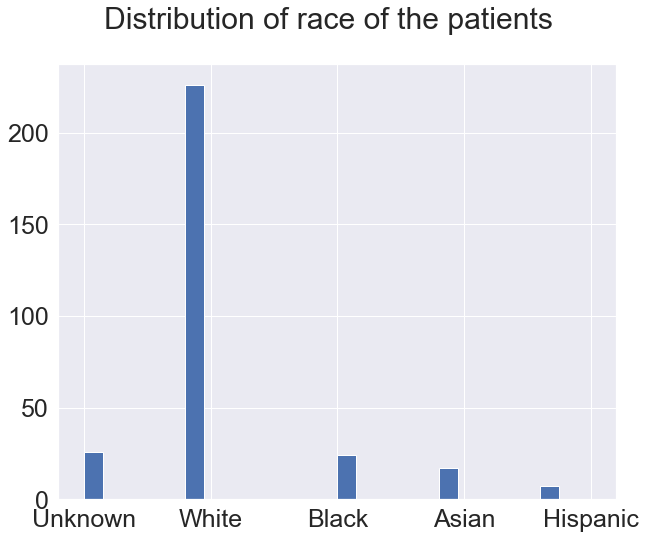

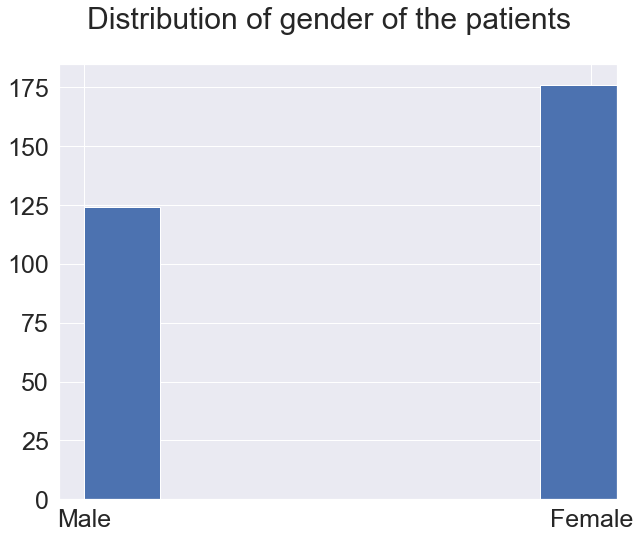

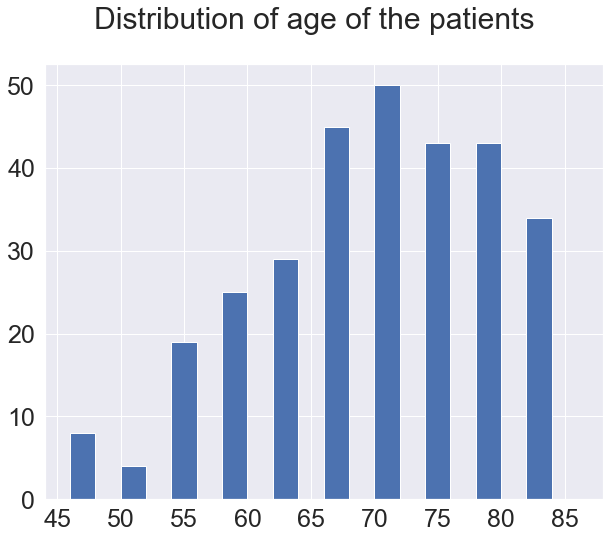

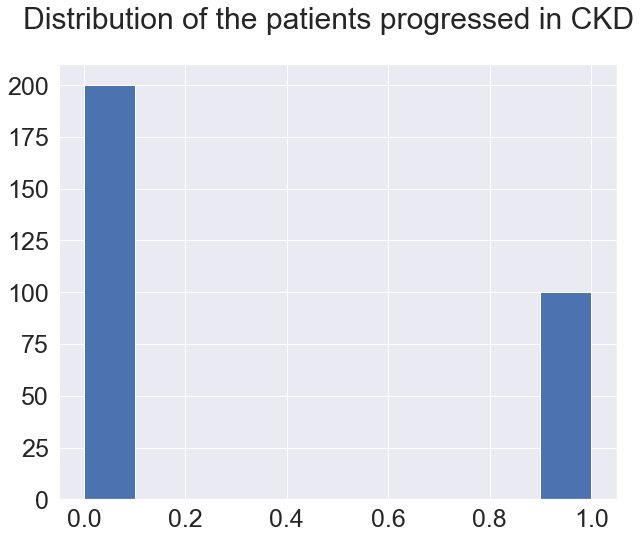

In [47]:
barWidth = 0.15

plt.figure(figsize=(10,8))
list4 = df[df.columns[1]]
x = np.asarray([i for i in range(0,len(list4))])
y = np.asarray([list4[i] for i in range(0,len(list4))])
counts = plt.hist(y, width=barWidth, label = "Race")
#plt.xlim([200, 400])         
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)   
plt.suptitle('Distribution of race of the patients',fontsize=30)
plt.show()

plt.figure(figsize=(10,8))
list4 = df[df.columns[2]]
x = np.asarray([i for i in range(0,len(list4))])
y = np.asarray([list4[i] for i in range(0,len(list4))])
plt.hist(y, width=barWidth, label = "Gender")
#plt.xlim([200, 400])         
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)    
plt.suptitle('Distribution of gender of the patients',fontsize=30)
plt.show()

barWidth = 2

plt.figure(figsize=(10,8))
list4 = df[df.columns[3]]
x = np.asarray([i for i in range(0,len(list4))])
y = np.asarray([list4[i] for i in range(0,len(list4))])
plt.hist(y, width=barWidth, label = "Age")
#plt.xlim([200, 400])         
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)    
plt.suptitle('Distribution of age of the patients',fontsize=30)
plt.show()

barWidth = 1

plt.figure(figsize=(10,8))
list4 = df8[df8.columns[1]]
x = np.asarray([i for i in range(0,len(list4))])
y = np.asarray([list4[i] for i in range(0,len(list4))])
x=x.astype(np.float32)
y=y.astype(np.float32)
counts = plt.hist(y, label = "Stage")
#plt.xlim([200, 400])         
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)   
plt.suptitle('Distribution of the patients progressed in CKD',fontsize=30)
plt.show()

#### Splitting and preprocessing the data

The data on demographics of the patients is split into training and testing input set. Before splitting, the races and genders of the patient is converted from words to numbers for convenience.   
Similarly, the data on the patient will progress in CKD or not is converted to 1 and 0 respectively and then the data is split into training and testing output set.

In [34]:
C = df.race.unique()
D = df.gender.unique()

for i in range(len(C)):
    df[['race']] = df[['race']].replace(to_replace = C[i], value = i)
      
for i in range(len(D)):
    df[['gender']] = df[['gender']].replace(to_replace = D[i], value = i)

print("----------------------------------------------------")
print(df)
print("----------------------------------------------------")

labels=df[['race','gender','age']]
features = df1[['Stage_Progress']].astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(labels, features, test_size=0.1, random_state=42) 

print(y_test)
print("----------------------------------------------------")

----------------------------------------------------
      id  race  gender  age
0      0     0       0   70
1      1     1       1   71
2      2     1       1   57
3      3     1       0   74
4      4     1       1   50
..   ...   ...     ...  ...
295  295     1       1   79
296  296     1       1   66
297  297     0       0   80
298  298     3       1   72
299  299     3       0   84

[300 rows x 4 columns]
----------------------------------------------------
     Stage_Progress
203             0.0
266             0.0
152             0.0
9               0.0
233             0.0
226             0.0
196             0.0
109             1.0
5               0.0
175             0.0
237             1.0
57              1.0
218             1.0
45              1.0
182             1.0
221             1.0
289             0.0
211             0.0
148             0.0
165             1.0
78              0.0
113             1.0
249             0.0
250             0.0
104             1.0
42            

#### Standardization of the data

The data is standardized using StandardScaler or MinMaxScaler before inputting the data into the neural network.

In [37]:
scaler = StandardScaler().fit(X_train[['age']])

A = scaler.transform(X_train[['age']])

B = scaler.transform(X_test[['age']])  

X_train[["age"]] = A

X_test[["age"]] = B

A = scaler.transform(X_train[['race']])

B = scaler.transform(X_test[['race']])  

X_train[["race"]] = A

X_test[["race"]] = B

A = scaler.transform(X_train[['gender']])

B = scaler.transform(X_test[['gender']])  

X_train[["gender"]] = A

X_test[["gender"]] = B

C = X_train.race.unique()
D = X_train.gender.unique()
print("------------------------------------------------------------")
print(C)
print("------------------------------------------------------------")
print(D)
print("------------------------------------------------------------")
print(y_train.Stage_Progress.unique())
print("------------------------------------------------------------")

------------------------------------------------------------
[-7.57597305 -7.6863623  -7.46558381 -7.35519456 -7.79675155]
------------------------------------------------------------
[-7.6863623  -7.79675155]
------------------------------------------------------------
[1. 0.]
------------------------------------------------------------


C:\Users\jetin\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\jetin\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\jetin\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

#### Neural Network 1 (Logistic Regression)

The basic architecture of neural network based on logistic regression.

In [38]:
print("------------------------------------------------------------")
model = Sequential()

model.add(Dense(1000, activation='sigmoid', kernel_regularizer=L1L2(l1=0.0, l2=1.1), input_shape=(3,)))

model.add(Dense(1000, activation='sigmoid'))

model.add(Dense(1000, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.summary()
print("------------------------------------------------------------")

------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              4000      
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 1001      
Total params: 2,007,001
Trainable params: 2,007,001
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------


#### Compiling the Neural Network 1

The compilation of the neural network using loss function as binary crossentropy, optimizer as adam and using accuracy as metric to test the performance of the network.

In [39]:
print("------------------------------------------------------------")
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)
print("------------------------------------------------------------")

------------------------------------------------------------
Epoch 1/20
270/270 [==============================] - 8s 30ms/step - loss: 1.2739 - acc: 0.6074
Epoch 2/20
270/270 [==============================] - 8s 29ms/step - loss: 0.6671 - acc: 0.6593
Epoch 3/20
270/270 [==============================] - 8s 28ms/step - loss: 0.6875 - acc: 0.6481
Epoch 4/20
270/270 [==============================] - 8s 29ms/step - loss: 0.6980 - acc: 0.6148
Epoch 5/20
270/270 [==============================] - 8s 28ms/step - loss: 0.6883 - acc: 0.6481
Epoch 6/20
270/270 [==============================] - 8s 29ms/step - loss: 0.6686 - acc: 0.6407
Epoch 7/20
270/270 [==============================] - 8s 28ms/step - loss: 0.6813 - acc: 0.6407: 1s - l
Epoch 8/20
270/270 [==============================] - 8s 30ms/step - loss: 0.6536 - acc: 0.6667
Epoch 9/20
270/270 [==============================] - 8s 30ms/step - loss: 0.7595 - acc: 0.6333
Epoch 10/20
270/270 [==============================] - 8s 30ms/step

#### Evaluating the Neural Network 1 on Test set

The trained neural network is evaluated on the test set to check its performance.

----------------------------------------------------
Accuracy of Logistic Regression Classifier : 0.5666666666666667
----------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           0       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30

----------------------------------------------------


C:\Users\jetin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


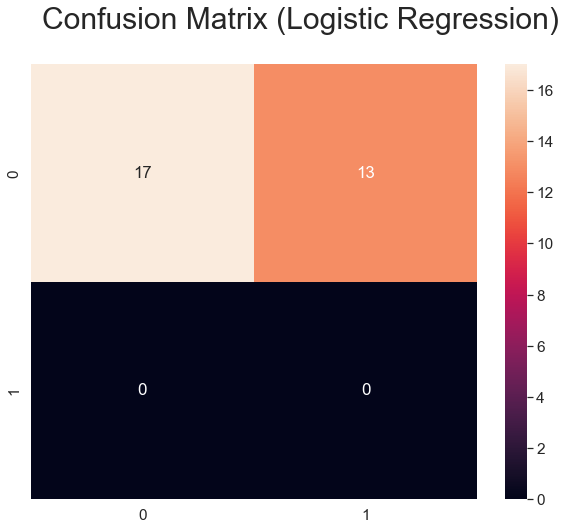

In [40]:
y_pred = model.predict_classes(X_test)
score = model.evaluate(X_test, y_test,verbose=0)

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.suptitle('Confusion Matrix (Logistic Regression)',fontsize=30)

print("----------------------------------------------------")
print("Accuracy of Logistic Regression Classifier :", accuracy_score(y_test, y_pred))
print("----------------------------------------------------")
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)
print("----------------------------------------------------")

#### Neural Network 2 (Decision Trees)

The basic architecture of neural network based on decision tree. Its compilation and evaluation on the test set.

----------------------------------------------------
Accuracy of Decision Tree Classifier : 0.5
----------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.08      0.12        13
           0       0.54      0.82      0.65        17

    accuracy                           0.50        30
   macro avg       0.39      0.45      0.38        30
weighted avg       0.41      0.50      0.42        30

----------------------------------------------------


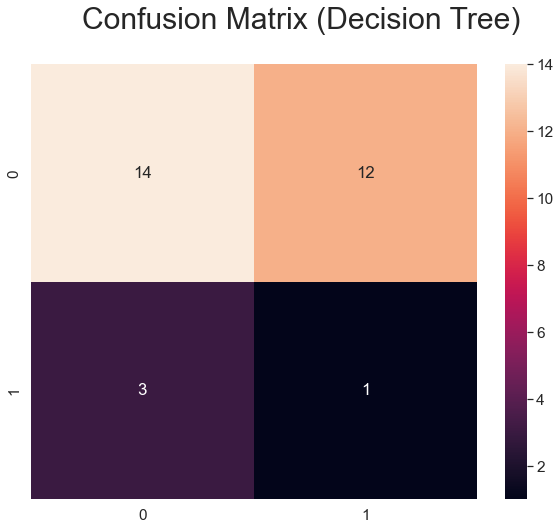

In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train) 
y_score = clf.fit(X_train, y_train).predict(X_test)

cm = confusion_matrix(y_score, y_test)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.suptitle('Confusion Matrix (Decision Tree)',fontsize=30)

print("----------------------------------------------------")
print("Accuracy of Decision Tree Classifier :", accuracy_score(y_test, y_score))
print("----------------------------------------------------")
matrix = classification_report(y_test,y_score,labels=[1,0])
print('Classification report : \n',matrix)
print("----------------------------------------------------")

#### Neural Network 3 (Random Forest)

The basic architecture of neural network based on random forest. Its compilation and evaluation on the test set.

C:\Users\jetin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jetin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


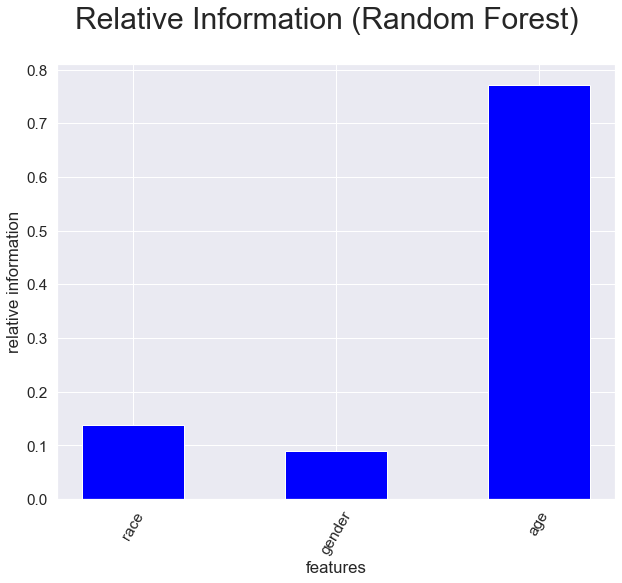

C:\Users\jetin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\jetin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\jetin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\jetin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


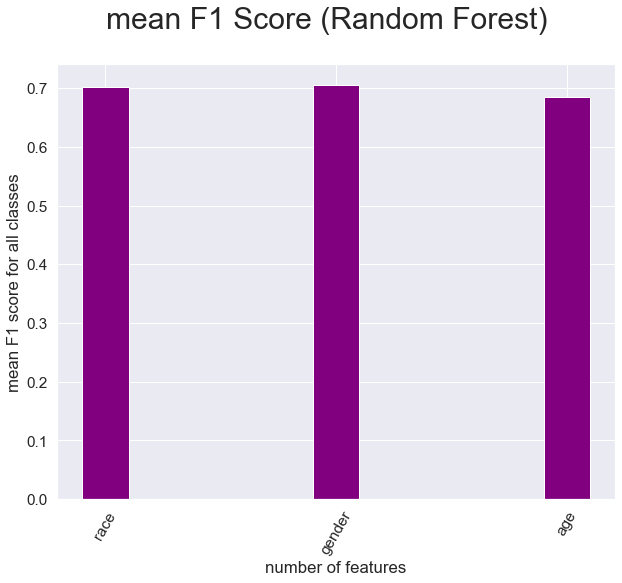

----------------------------------------------------
Accuracy of Random Forest Classifier :  0.4666666666666667
----------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.15      0.20        13
           0       0.52      0.71      0.60        17

    accuracy                           0.47        30
   macro avg       0.40      0.43      0.40        30
weighted avg       0.42      0.47      0.43        30

----------------------------------------------------


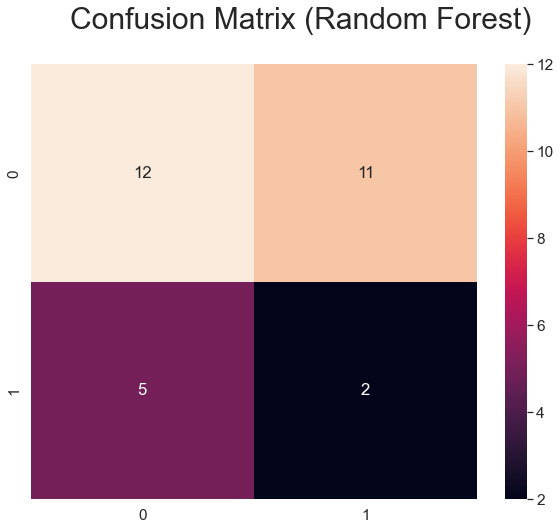

In [42]:
n_trees = 1000
rf = RandomForestClassifier(n_trees)
rf.fit(X_train, y_train)
features = ["race","gender","age"]
plt_x = np.linspace(0,len(features)-1,len(features))
# print("Features sorted by their score:")
# print(sorted(zip(map(lambda x: float("{0:.2f}".format(round(x, 4))), rf.feature_importances_), features),
#              reverse=True))

plt.figure(figsize=(10,8))
plt.bar(plt_x, rf.feature_importances_, width=0.5, color="blue",align='center')
plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(plt_x, features)
plt.ylabel("relative information")
plt.xlabel("features")
plt.suptitle('Relative Information (Random Forest)',fontsize=30)
plt.show()

### F1-score sweep over features
F1 = []
plt_x = np.linspace(0,len(features)-1,len(features))
n_trees = 1 # set n_trees to a limiting small number to find out features' effect on constrained models
for i in range(len(features)):
    rf = RandomForestClassifier(n_trees, max_features = i+1)
    rf.fit(X_train, y_train)
    Y_pred = rf.predict(X_train)
    F1.append(np.mean(f1_score(y_train,Y_pred, average  = None)))
plt.figure(figsize=(10,8))
plt.bar(plt_x, F1, width=0.2, color="purple",align='center')
plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(plt_x,features)
plt.ylabel("mean F1 score for all classes")
plt.xlabel("number of features")
plt.suptitle('mean F1 Score (Random Forest)',fontsize=30)
plt.show()

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.suptitle('Confusion Matrix (Random Forest)',fontsize=30)

print("----------------------------------------------------")
print("Accuracy of Random Forest Classifier : ", accuracy_score(y_test, y_pred))
print("----------------------------------------------------")

matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)
print("----------------------------------------------------")

#### Neural Network 4 (MLP Classifier)

The basic architecture of neural network based on MLP Classifier. Its compilation and evaluation on the test set.

C:\Users\jetin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------
Accuracy of MLPClassifier : 0.5333333333333333
----------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.33      0.08      0.12        13
           0       0.56      0.88      0.68        17

    accuracy                           0.53        30
   macro avg       0.44      0.48      0.40        30
weighted avg       0.46      0.53      0.44        30

----------------------------------------------------


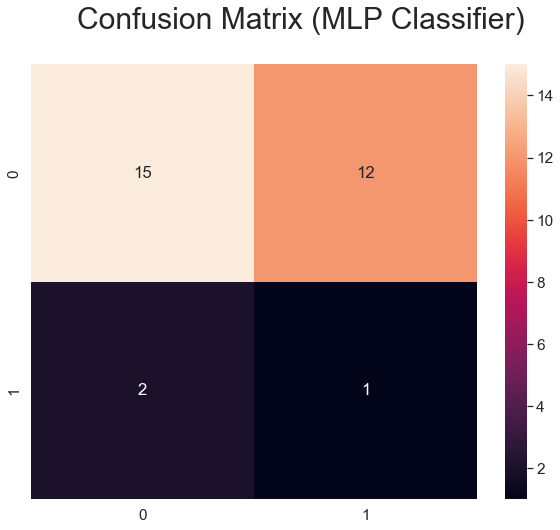

In [44]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.suptitle('Confusion Matrix (MLP Classifier)',fontsize=30)

print("----------------------------------------------------")
print("Accuracy of MLPClassifier :", accuracy_score(y_test, y_pred))
print("----------------------------------------------------")

matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)
print("----------------------------------------------------")